6132 Курицын Никита  
Лабораторная работа №4: Классификация. Деревья решений

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

1. Считать в pandas.DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [2]:
data = pd.read_csv('Cancer_Data.csv')# считываем с помощью метода read_csv и помещяем данные в data

2. Датасет и подготовка данных:

Привести описание датасета.

Этот датасет содержит характеристики клеток, которые используются для диагностики рака молочной железы. 

Этот датасет содержит характеристики клеток, которые используются для диагностики рака молочной железы. Краткое описание столбцов в датасете:

1. **id**: Уникальный идентификатор для каждой записи.
2. **diagnosis**: Диагноз, который может быть "M" (злокачественный) или "B" (доброкачественный).
3. **radius_mean**: Средний радиус ядра клетки.
4. **texture_mean**: Средняя текстура клетки (измеряется как стандартное отклонение значений интенсивности).
5. **perimeter_mean**: Средний периметр клетки.
6. **area_mean**: Средняя площадь клетки.
7. **smoothness_mean**: Средняя гладкость клеточной поверхности (измеряется как стандартное отклонение радиальных длин).
8. **compactness_mean**: Средняя компактность клетки (вычисляется как периметр^2 / площадь - 1.0).
9. **concavity_mean**: Средняя вогнутость клеточной поверхности (глубина вогнутых частей клеточной поверхности).
10. **concave points_mean**: Среднее количество вогнутых точек на клеточной поверхности.
11. **texture_worst**: Характеристика текстуры для самой худшей части клетки.
12. **perimeter_worst**: Характеристика периметра для самой худшей части клетки.
13. **area_worst**: Характеристика площади для самой худшей части клетки.
14. **smoothness_worst**: Характеристика гладкости для самой худшей части клетки.
15. **compactness_worst**: Характеристика компактности для самой худшей части клетки.
16. **concavity_worst**: Характеристика вогнутости для самой худшей части клетки.
17. **concave points_worst**: Характеристика вогнутых точек для самой худшей части клетки.
18. **symmetry_worst**: Характеристика симметрии для самой худшей части клетки.
19. **fractal_dimension_worst**: Характеристика фрактальной размерности для самой худшей части клетки.

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Осуществить предобработку данных (избавиться от null, убрать некоторые признаки и т.п.) - "подчистить данные".

In [6]:
data = data.drop('id',axis=1)
data = data.drop('Unnamed: 32',axis=1)

In [7]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
data['diagnosis'] = data['diagnosis'].replace({'M': 0, 'B': 1})

In [9]:
data['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [10]:
data = data.fillna(data.mean())

In [11]:
X = data.drop(columns = ['diagnosis'])
y = data['diagnosis']

Разбить выборку на обучающую и тестовую.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
print(f"Тренировочная выборка имеет {X_train.shape[0]} экземпляров и {X_train.shape[1]} признаков\nЧисло разных классов --> {np.bincount(y_train)}")
print("--------------------")
print(f"Тестовая выборка имеет {X_test.shape[0]} экземпляров и {X_test.shape[1]} признаков\nЧисло разных классов --> {np.bincount(y_test)}")

Тренировочная выборка имеет 455 экземпляров и 30 признаков
Число разных классов --> [169 286]
--------------------
Тестовая выборка имеет 114 экземпляров и 30 признаков
Число разных классов --> [43 71]


3. Дерево решений:
4. Случайный лес:
5. Метод ближайших соседей:

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

In [32]:
def getDecisionTreeClassifier():
    return DecisionTreeClassifier()

In [33]:
def getRandomForestClassifier():
    return RandomForestClassifier()

In [34]:
def getKNeighborsClassifier():
    return KNeighborsClassifier()

In [128]:
parametrs = {   'max_depth': range(1,5),
                'max_features': range(2,10,2)}
parametsr_KNN = {
                'n_neighbors': [3, 5, 7],
                'metric': ['euclidean', 'manhattan', 'chebyshev']}
models_dict = { 'Классификатор дерева решений' : [getDecisionTreeClassifier,parametrs],
                'Случайный лес': [getRandomForestClassifier, parametrs],
                'классификатор k-ближайших соседей': [getKNeighborsClassifier,parametsr_KNN]}


In [118]:
def selectFeatures_KNN(x_train):
    correlation_matrix = x_train.corr()
    data_array = correlation_matrix.values
    np.fill_diagonal(data_array, 0)
    threshold = 0.5
    filtered_corr = correlation_matrix[abs(correlation_matrix) > threshold]
    feature_importance = filtered_corr.sum()
    feature_importance = feature_importance.sort_values(ascending=False)
    plot_threshold = 10
    feature_importance = feature_importance.sort_values(ascending=False)
    selected_features_index = feature_importance[feature_importance.abs() > plot_threshold].index
    selected_column_numbers = [x_train.columns.get_loc(col) for col in selected_features_index]
    print(selected_column_numbers)
    return selected_column_numbers

In [119]:
def start_Process(model: callable,parametrs: dict, x_train, y_train, x_test, y_test, isFirst = True):
    
    grid = GridSearchCV(model(), parametrs, cv=5)
    grid.fit(x_train, y_train)
    best_params = grid.best_params_
    model_Best = model()
    model_Best.set_params(**best_params)   
    model_Best.fit(x_train, y_train)
    y_pred = model_Best.predict(x_test)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion, display_labels=[0, 1])
    if isFirst:
        if  isinstance(model_Best, KNeighborsClassifier):
            return report, disp, selectFeatures_KNN(x_train)
        else:
            feature_importances = model_Best.feature_importances_
        best_features = [feature for feature, importance in enumerate(feature_importances) if importance > 0.1]
        print(best_features)
        return report, disp, best_features
    return report,disp

Классификатор дерева решений
[22]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        43
           1       0.92      0.97      0.95        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        43
           1       0.91      1.00      0.95        71

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



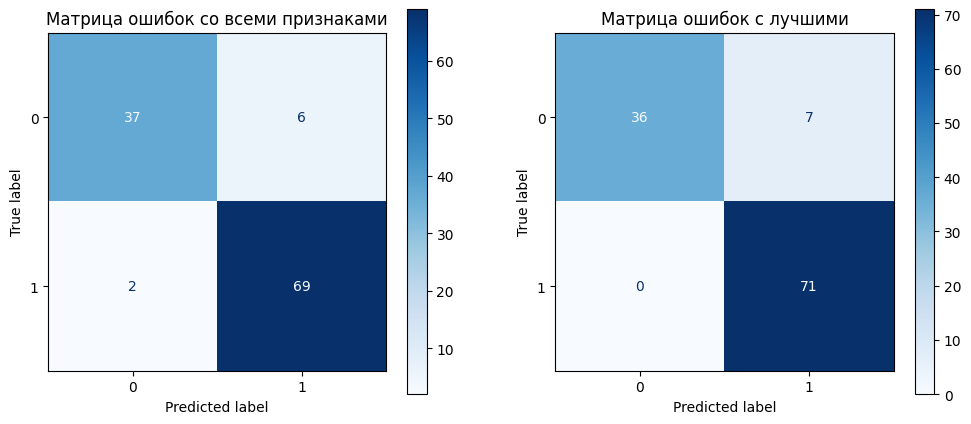

---------------------

Случайный лес
[7, 20, 22, 23, 27]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



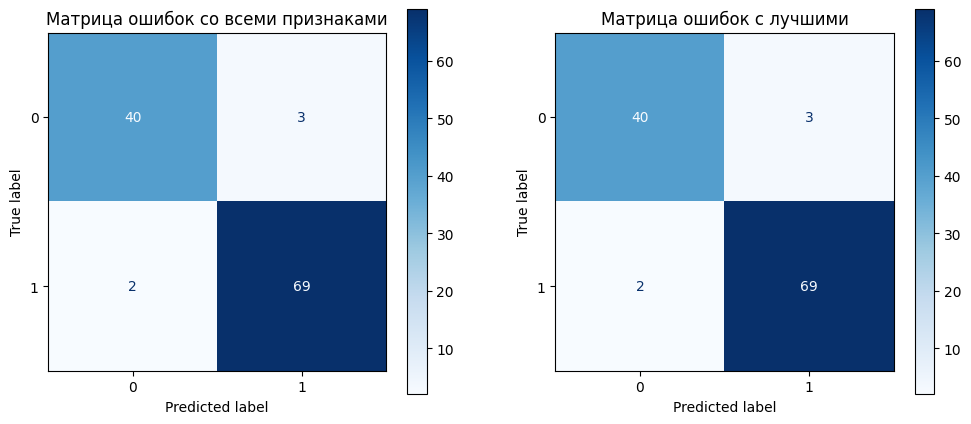

---------------------

классификатор k-ближайших соседей
[6, 27, 7, 5, 22, 20, 2]
              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.99      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



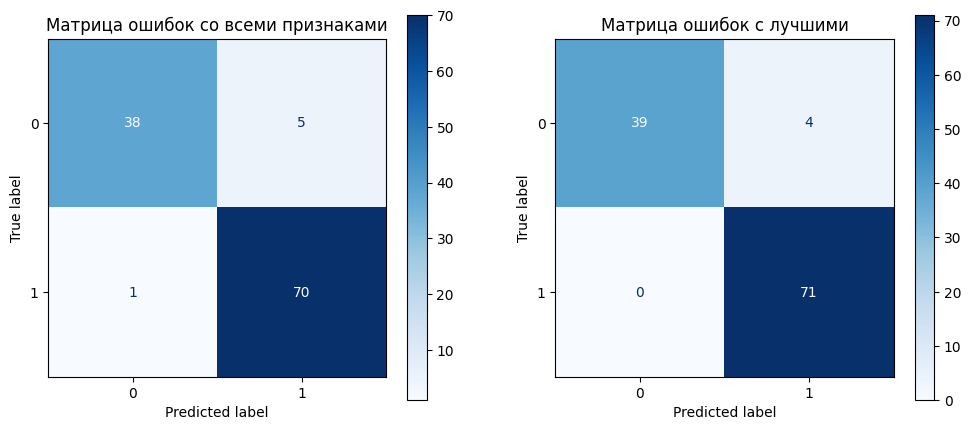

---------------------



In [122]:
index_array = np.empty((0,), dtype=int)
for key, value in models_dict.items():
    print(key)
    fig_1, axes_1 = plt.subplots(1, 2, figsize=(12, 5))
    
    report_1,disp_1, best_features_1 = start_Process(value[0], value[1], X_train,y_train,X_test,y_test)
    
    X_train_filt = X_train.iloc[:,best_features_1]
    X_test_filt = X_test.iloc[:,best_features_1]
    
    index_array = np.concatenate((index_array, best_features_1))
    report_2,disp_2 = start_Process(value[0], value[1], X_train_filt,y_train,X_test_filt,y_test,False)
    
    print(report_1)
    print(report_2)
    
    disp_1.plot(cmap=plt.cm.Blues, ax=axes_1[0])
    axes_1[0].set_title('Матрица ошибок со всеми признаками')
    
    disp_2.plot(cmap=plt.cm.Blues, ax=axes_1[1])
    axes_1[1].set_title('Матрица ошибок с лучшими')
    plt.show()
    
    print("---------------------\n")

6. Объединил все лучшие признаки
7. Визуализировать любое полученное дерево решений

In [124]:
unique_array = np.unique(index_array)
unique_array

array([ 2,  5,  6,  7, 20, 22, 23, 27])

In [125]:
X_train_unique = X_train.iloc[:,unique_array]
X_test_unique = X_test.iloc[:,unique_array]

Классификатор дерева решений
              precision    recall  f1-score   support

           0       0.95      0.88      0.92        43
           1       0.93      0.97      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



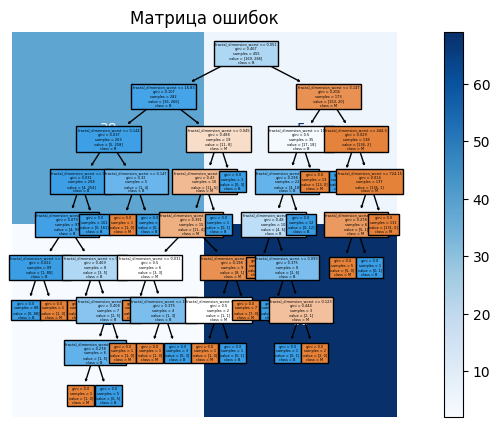

---------------------

Случайный лес
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



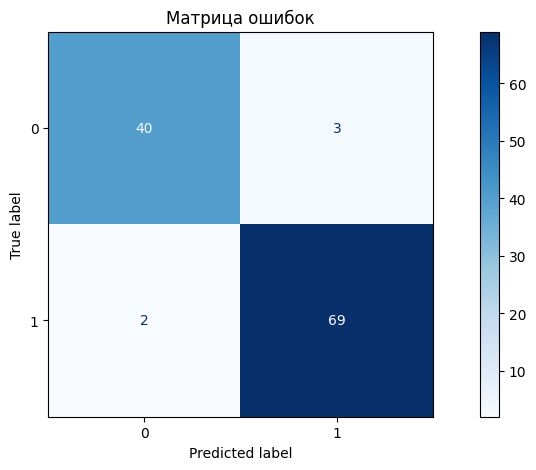

---------------------

классификатор k-ближайших соседей
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        43
           1       0.92      0.97      0.95        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



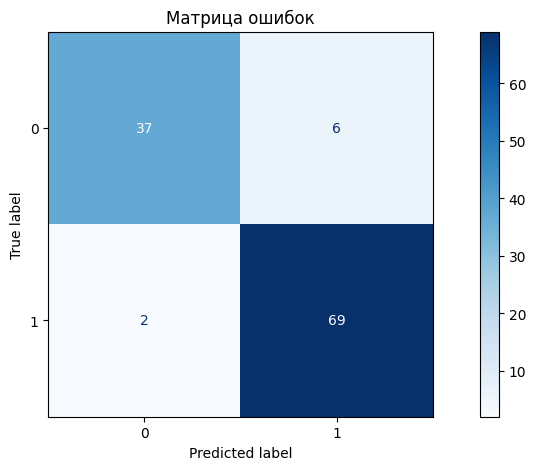

---------------------



In [136]:
fn = X_train.columns[X_train.columns.get_indexer(unique_array)]
cn = ['M','B']
for key, value in models_dict.items():
    
    print(key)
    fig_1, axes_1 = plt.subplots(1, 1, figsize=(12, 5))
    model = value[0]()
    model.fit(X_train_unique, y_train)
    y_pred = model.predict(X_test_unique)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion, display_labels=[0, 1])
   
    print(report)
    if  isinstance(model, DecisionTreeClassifier):
        plot_tree(model, feature_names = fn, class_names=cn, filled = True);

    disp.plot(cmap=plt.cm.Blues, ax=axes_1)
    axes_1.set_title('Матрица ошибок')
    plt.show()
    
    print("---------------------\n")

Классификатор дерева решений из задания 3: После отбора признаков правильно предсказал весь класс 1 (против 2 при всех признаках), но ошибся 7 раз в классе 0 (против в 6  при всех признаках).  
Случайный лес из задания 4:  Показал всё тоже самое.  
Классификатор k-ближайших соседей: После отбора признаков правильно предсказал весь класс 1 (против 1 при всех признаках), но ошибся 4 раз в классе 0 (против в 5  при всех признаках).  

In [140]:
Лучшие модели:
Классификатор дерева решений:
 precision    recall  f1-score   support

           0       1.00      0.84      0.91        43
           1       0.91      1.00      0.95        71

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114
Случайный лес:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96   
классификатор k-ближайших соседей:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114    114

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 8)

На основе приведенных метрик, можно сделать следующие выводы:
Случайный лес и k-NN показывают одинаковую точность (96%) и имеют высокие значения precision, recall и f1-score.
Дерево решений немного уступает в точности (94%) и других метриках по сравнению с двумя другими моделями. Спорный выбор...